In [1]:
#The Amazon reviews polarity dataset is constructed by taking review score 1 and 2 as negative, and 4 and 5 as positive. #Samples of score 3 is ignored. In the dataset, class 1 is the negative and class 2 is the positive. Each class has 1,800,000 training samples and 200,000 testing samples.

In [2]:
#https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews

In [3]:
import numpy as np 
import pandas as pd 
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv("test.csv")


In [142]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (399999, 3)


In [8]:
column_names = ["Rating","Title", "Review"]
df.columns = column_names
print("\nDataFrame with Custom Column Names:")
print(df)


print(f"Feature names: {df.columns.values}")


DataFrame with Custom Column Names:
        Rating                                              Title  \
0            2  One of the best game music soundtracks - for a...   
1            1                   Batteries died within a year ...   
2            2              works fine, but Maha Energy is better   
3            2                       Great for the non-audiophile   
4            1              DVD Player crapped out after one year   
...        ...                                                ...   
399994       1                         Unbelievable- In a Bad Way   
399995       1                    Almost Great, Until it Broke...   
399996       1                                   Disappointed !!!   
399997       2                            Classic Jessica Mitford   
399998       1                        Comedy Scene, and Not Heard   

                                                   Review  
0       Despite the fact that I have only played a sma...  
1       I boug

In [6]:
df.isnull().sum()

2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               0
Great CD                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [9]:
df[df["Title"].isna() == True]


,Rating,Title,Review
204,2,NaN,Awesome.... simply awesome. I couldn't put thi...
2702,1,NaN,Who is Joe Nickell? What are his qualification...
10874,1,NaN,None the palace of pleasure volume l is not wo...
47629,1,NaN,Crazy¡! I am 10 and this book was not a gud in...
66726,1,NaN,this is a tereble book. dont read this book. i...
83135,1,NaN,The book does have some good info but is dated...
86251,2,NaN,i have every book written by nora roberts this...
101745,1,NaN,OMG! WHAT FREAK! THIS WAS THE ANSWER TO TO DEM...
112956,2,NaN,Random House failed to edit this book. There a...
120212,2,NaN,This CD is good. A lot of the songs on here wa...


In [146]:
df.dtypes

Rating     int64
Title     object
Review    object
dtype: object

In [147]:
# 1 - Negative
# 2 - Positive
print(f"Rating value count: \n {df['Rating'].value_counts()}")

Rating value count: 
 Rating
1    200000
2    199999
Name: count, dtype: int64


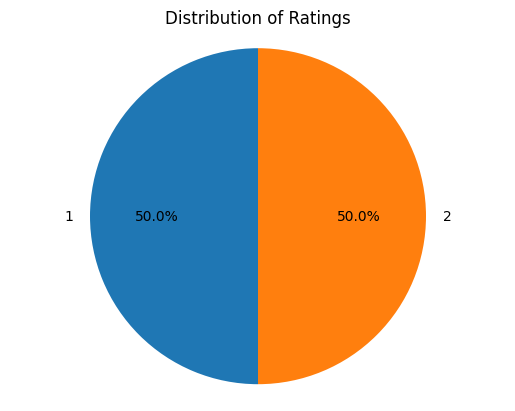

In [148]:
# Sample data
ratings = df['Rating'].value_counts()

# Create a pie chart
plt.pie(ratings, labels=ratings.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Set the title
plt.title('Distribution of Ratings')

# Display the chart
plt.show()

In [149]:
#Analyzing review column

In [150]:
review_1 = df[df["Rating"] == 1].iloc[1:5]["Review"]
print(review_1)

4    I also began having the incorrect disc problem...
5    I love the style of this, but after a couple y...
6    I cannot scroll through a DVD menu that is set...
8    Firstly,I enjoyed the format and tone of the b...
Name: Review, dtype: object


In [151]:
review_2 = df[df["Rating"] == 2].iloc[:5]["Review"]
print(review_2)

0    Despite the fact that I have only played a sma...
2    Check out Maha Energy's website. Their Powerex...
3    Reviewed quite a bit of the combo players and ...
7    Exotic tales of the Orient from the 1930's. "D...
9    I currently live in Europe, and this is the bo...
Name: Review, dtype: object


In [152]:
print(f"Title value count: \n {df['Title'].value_counts()}") 

Title value count: 
 Title
Disappointed                               1046
Disappointing                              1042
Excellent                                   504
Great                                       399
Don't waste your money                      370
                                           ... 
Still rockin'!                                1
Maybe I got a lemon but.....                  1
great machine to make a costume               1
Will change your perspective on things.       1
Comedy Scene, and Not Heard                   1
Name: count, Length: 328391, dtype: int64


In [158]:
df.groupby("Title")["Rating"].mean()

Title
!                                                  1.875
! Concise && ( not very good with the examples)    1.000
! DANGER! This film blows chunks                   1.000
! Don't buy this !                                 1.000
! IF YOU HAD THE VOICE ! IT WILL BE BETTER         1.000
                                                   ...  
¿Esto es música? Patético...                       1.000
¿Is this a joke?                                   1.000
¿es el final de una saga tan maravillosa?          1.000
É un buon CD!                                      2.000
Ótimo livro. Merece ser lido.                      2.000
Name: Rating, Length: 328391, dtype: float64

In [166]:
from collections import Counter

# Count word frequencies
word_counts = Counter(' '.join(df['Review']).split())

# Create a DataFrame from the Counter
Frequency_words = pd.DataFrame(word_counts.items(), columns=['Words', 'Frequency'])

# Sort by frequency in descending order
Frequency_words = Frequency_words.sort_values('Frequency', ascending=False)


print(Frequency_words.head(20))


    Words  Frequency
1     the    1310325
29    and     793587
4       I     738406
17     to     726030
8       a     714386
11     of     588740
37     is     514739
30     it     412368
76   this     404486
58     in     328474
103   for     303164
3    that     282604
21    was     254548
125  with     210129
339   you     203757
72     on     199093
5    have     193405
52    not     192496
167   but     185359
105   The     182591


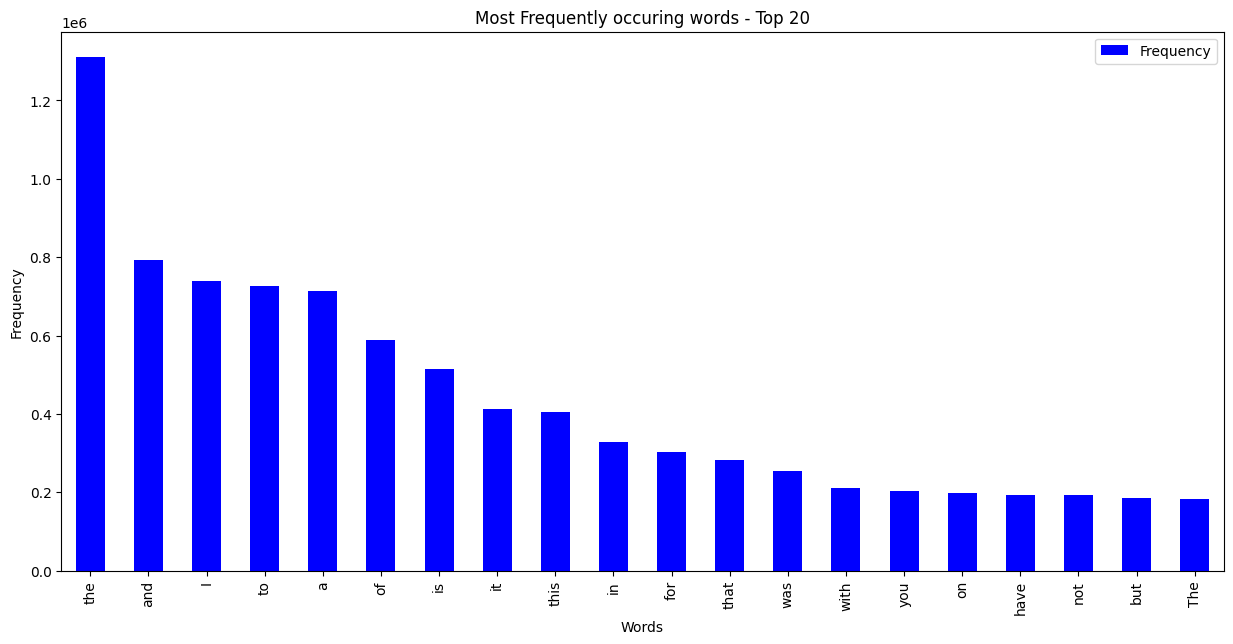

In [167]:
Top20 = Frequency_words[['Words','Frequency']].head(20)
Top20.plot(x="Words", y="Frequency", kind='bar',  figsize=(15,7), color = 'blue')
plt.title("Most Frequently occuring words - Top 20")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

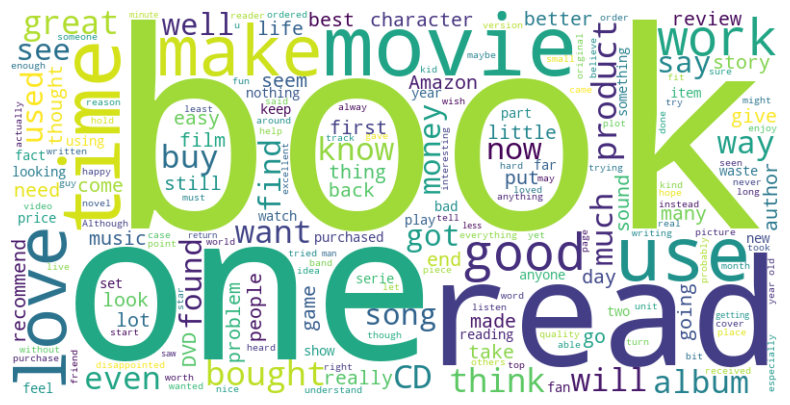

In [168]:
# Combine all reviews into a single string
all_reviews = ' '.join(df['Review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()